In [1]:
#Installing libraries

import pandas as pd
trxn = pd.read_csv('Retail_Data_Transactions.csv')

In [2]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
#merging both the tables
df = trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [12]:
#features

df.dtypes   # shows the datatype of each column
df.shape    # shows the dimension of the table
df.head()   # shows the top 5 rows of the table
df.tail()   # shows the bottom 5 rows of the table
df.describe()  # shows the description of the table(can be done only for numeric values) -> statistical features

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [14]:
#missing values

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [15]:
#checking the percentage
31/125000*100

0.024800000000000003

In [16]:
#as its less than 5-10% we can delete the rows
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [19]:
#change the datatype
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response'] = df['response'].astype('int64')
df

<ipython-input-19-09a4536602a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])
<ipython-input-19-09a4536602a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df['response'].astype('int64')


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [20]:
set(df['response'])

{0, 1}

In [43]:
df.dtypes
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [45]:
#check for outliers
# using z_scores method

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

#set a threshold
threshold= 3

outliers= z_scores>threshold

print([outliers])

[array([False, False, False, ..., False, False, False])]


In [46]:
#check for outliers
# using z_scores method

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['response']))

#set a threshold
threshold= 3

outliers= z_scores>threshold

print([outliers])

[array([False, False, False, ..., False, False, False])]


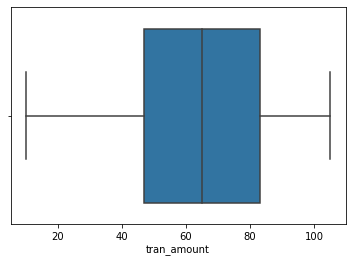

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [50]:
# creating new columns
df['month']=df['trans_date'].dt.month
df

<ipython-input-50-3cc094d8d766>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [52]:
# which 3 months have had the highest transaction amount
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [59]:
# customers having highest sum of orders

customer_count = df['customer_id'].value_counts().reset_index()
customer_count.columns=['customer_id','count']
customer_count

#sort
top_5_cus = customer_count.sort_values(by='count', ascending=False).head()
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS2620,35


<AxesSubplot:xlabel='customer_id', ylabel='count'>

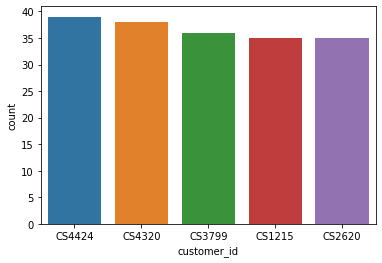

In [60]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [64]:
# customers having highest value of orders

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#sort
top_5_sal = customer_sales.sort_values(by='tran_amount', ascending=False).head()
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<AxesSubplot:xlabel='customer_id', ylabel='tran_amount'>

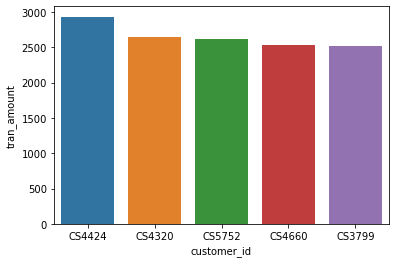

In [65]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

## Advanced Analytics 

### Time Series Analysis

<ipython-input-68-2001e8fca424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('M')


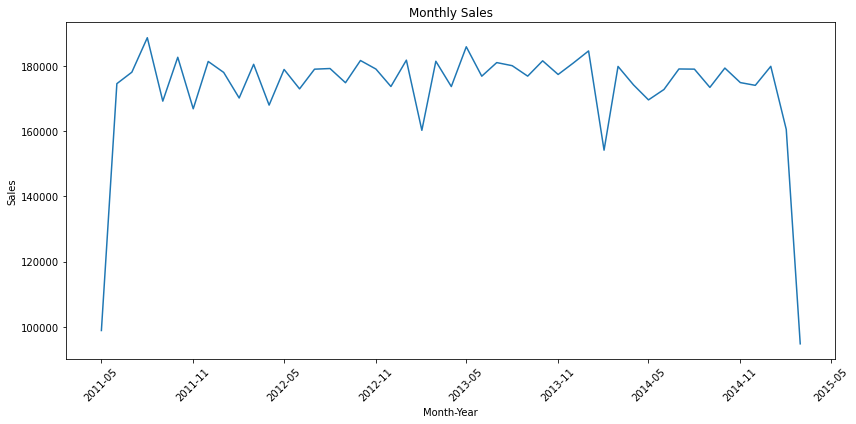

In [68]:
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cohort Segmentation

In [69]:
# Recency
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetry
monetry = df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm = pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetry':monetry})
rfm

,recency,frequency,monetry
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [71]:
# customer segmentation

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >=15 and row['monetry'] > 1000:
        return 'PO'
    elif(2011 <= row['recency'].year < 2012) and (10 < row['frequency'] < 15) and (500 <= row['monetry'] <= 1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm

,recency,frequency,monetry,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,PO
CS1113,2015-02-09,20,1490,PO
CS1114,2015-02-12,19,1432,PO
CS1115,2015-03-05,22,1659,PO
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### Churn Analysis

<AxesSubplot:>

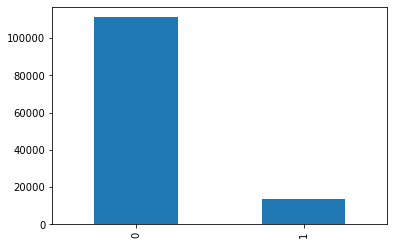

In [73]:
# Count the numbers of churned and active customers
churn_counts = df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')

### Analyzing top customers




<AxesSubplot:xlabel='month_year'>

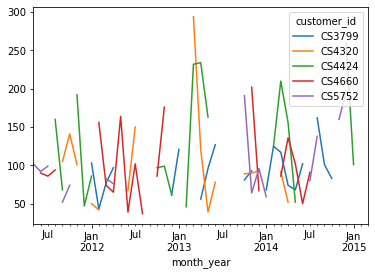

In [84]:
top_5_cus = monetry.sort_values(ascending=False).head(5).index

top_customers_df = df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [76]:
# converting to csv

df.to_csv('MainData.csv')

In [86]:
rfm.to_csv('AdditionalAnalysis.csv')

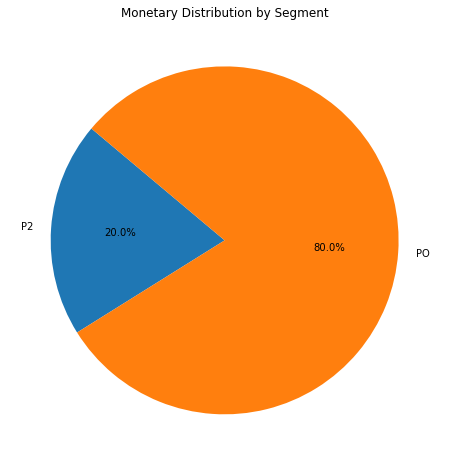

In [88]:
import matplotlib.pyplot as plt

data = rfm.groupby('Segment')['monetry'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Monetary Distribution by Segment')
plt.show()